In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [303]:
patientNumber = "12"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))

In [304]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

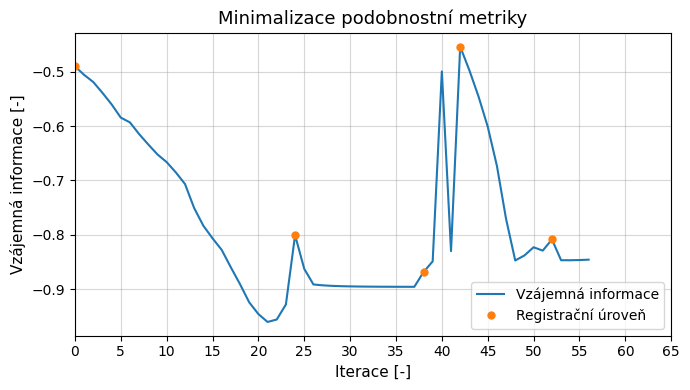

In [310]:
def plotMetricValues(metric_values, multires_iters, save):
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    ax_metric.plot(multires_iters, metric_values[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6.)
    ax_metric.set_xlabel("Iterace [-]", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace [-]", fontsize=11)
    ax_metric.set_title("Minimalizace podobnostní metriky", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 5))
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_metric.grid(alpha=0.5)
    ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")

plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], save=True)

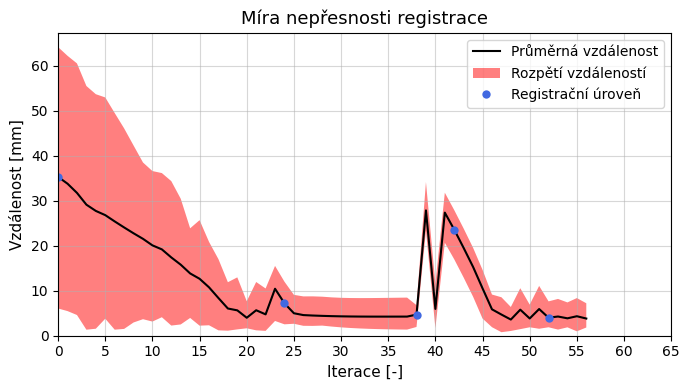

In [311]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, save=False):
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozpětí vzdáleností")
    ax_tre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none",
                  markeredgecolor="none", markersize=6., c="royalblue")
    ax_tre.set_xlabel("Iterace [-]", fontsize=11)
    ax_tre.set_ylabel("Vzdálenost [mm]", fontsize=11)
    ax_tre.set_title("Míra nepřesnosti registrace", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 5))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")

plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], save=True)

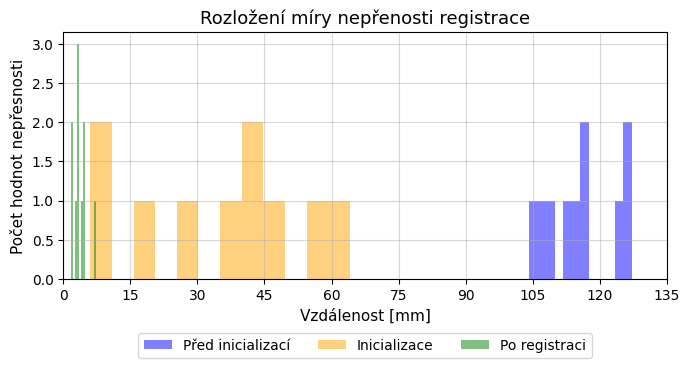

In [307]:
def plotErrorHistogram(errors, save=False):
    fig_hist, ax_hist = plt.subplots(1, 1, figsize=(7, 4))
    ax_hist.hist(errors[0, :], bins=12, alpha=0.5, label="Před inicializací", color="blue")
    ax_hist.hist(errors[1, :], bins=12, alpha=0.5, label="Inicializace", color="orange")
    ax_hist.hist(errors[-1, :], bins=12, alpha=0.5, label="Po registraci", color="green")
    ax_hist.set_xticks(np.arange(0, errors[0, :].max() + 10, 15))
    # ax_hist.set_yticks(np.arange(0, , dtype=int))
    ax_hist.set_xlim([0, None])
    ax_hist.set_ylim([0, None])
    ax_hist.set_xlabel("Vzdálenost [mm]", fontsize=11)
    ax_hist.set_ylabel("Počet hodnot nepřesnosti", fontsize=11)
    ax_hist.set_title("Rozložení míry nepřenosti registrace", fontsize=13)
    ax_hist.grid(alpha=0.5)
    ax_hist.legend(loc="lower center", ncols=3, bbox_to_anchor=(0.5, -0.35))
    fig_hist.tight_layout()
    plt.show()
    
    if save:
        fig_hist.savefig(f"{regDir}pacient{patientNumber}Hist{view.upper()}.pdf", bbox_inches="tight")

plotErrorHistogram(errorsInfo["errorValues"], save=True)

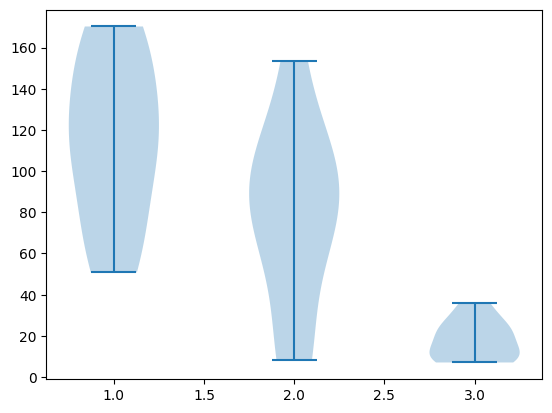

In [177]:
data = np.array([errorsInfo["errorValues"][0, :], 
                 errorsInfo["errorValues"][1, :], 
                 errorsInfo["errorValues"][-1, :]]).T
plt.violinplot(data)
plt.show()

In [173]:
data.shape

(3, 10)